## Model Training using K-means with PCA

In [17]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.metrics import accuracy_score
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=FutureWarning)


# Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) =  tf.keras.datasets.cifar10.load_data()

# Reshape the dataset to 2D array
n_samples_train = len(X_train)
X_train = X_train.reshape((n_samples_train, -1))
n_samples_test = len(X_test)
X_test = X_test.reshape((n_samples_test, -1))

# Scale the dataset
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255


# Perform PCA to reduce the dimensionality of the dataset
pca = PCA(n_components=250)
X_train = pca.fit_transform(X_train)


# Train the K-Means model
n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters, random_state=40,n_jobs=-1).fit_predict(X_train)

## Saving and loading the model

In [21]:
import pickle

# Save the K-Means model using pickle
with open('kmeans_model.pkl', 'wb') as f:
    pickle.dump(kmeans, f)

# Load the K-Means model using pickle
with open('kmeans_model.pkl', 'rb') as f:
    kmeans_loaded = pickle.load(f)


## Visualizing the cluster points

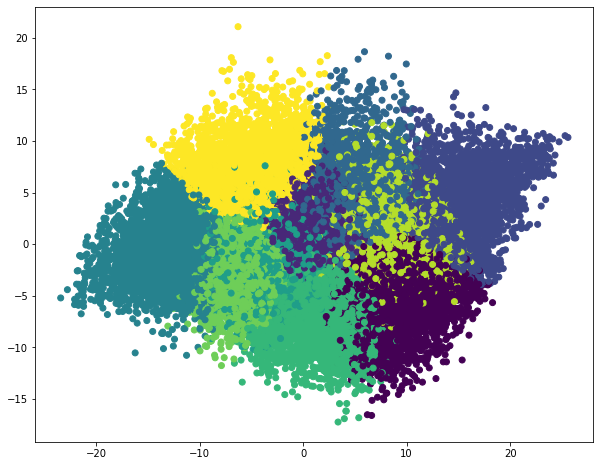

In [19]:
# Set the figure size and resolution
fig = plt.figure(figsize=(10, 8))

# Plot the results
plt.scatter(X_train[:, 0], X_train[:, 1], c=kmeans)

## Performing Evaluation Metrics

In [18]:
from sklearn.metrics import silhouette_score, davies_bouldin_score


# Evaluate clustering with Silhouette Score and Davies-Bouldin Score
silhouette = silhouette_score(X_train, kmeans)
s_kmeans = silhouette_score(X_train, kmeans)
davies_bouldin = davies_bouldin_score(X_train, kmeans)
db_kmeans = davies_bouldin_score(X_train, kmeans)
print(f"K-means clustering results: Silhouette Score = {silhouette}, Davies-Bouldin Score = {davies_bouldin}")

K-means clustering results: Silhouette Score = 0.053833719342947006, Davies-Bouldin Score = 2.7032070192496938


In [20]:
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X_train)
cluster_labels = np.zeros((n_clusters,))
for i in range(n_clusters):
    mask = kmeans.labels_ == i
    class_counts = np.bincount(y_train[mask].flatten())
    cluster_labels[i] = np.argmax(class_counts)

## Checking the test accuracy

In [6]:
# Load the test data
import tensorflow as tf
(X_test, y_test), _ = tf.keras.datasets.cifar10.load_data()
X_test = X_test.reshape(X_test.shape[0], -1)

# Scale the dataset
X_test = X_test.astype('float32') / 255


# Perform PCA to reduce the dimensionality of the test dataset
X_test = pca.transform(X_test)


# Predict the cluster for each test sample
test_clusters = kmeans.predict(X_test)

# Map each cluster to a predicted class label
predicted_labels = []
for cluster in test_clusters:
    predicted_labels.append(cluster_labels[cluster])

# Calculate the accuracy of the predictions
accuracy = np.mean(np.array(predicted_labels) == y_test.flatten())
print('Accuracy: {:.2f}%'.format(accuracy*100))


Accuracy: 22.11%


## Predicting on test set images

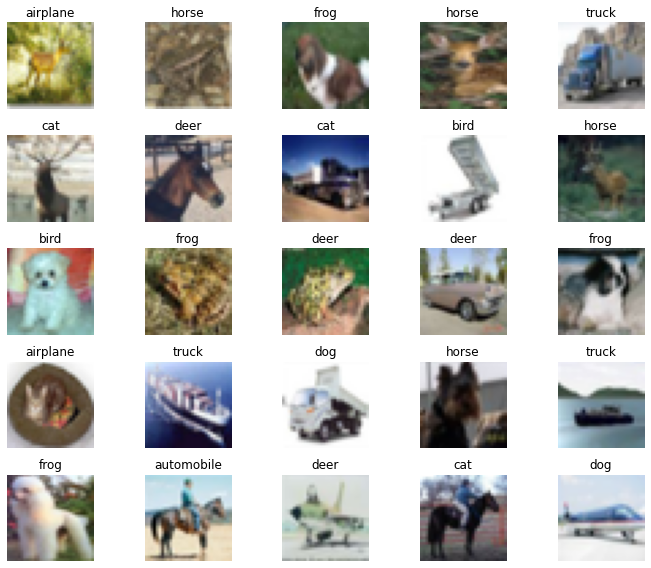

In [32]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) =  tf.keras.datasets.cifar10.load_data()

fig, axes = plt.subplots(5, 5, figsize=(10, 8))
for i, ax in enumerate(axes.ravel()):
    if i < len(X_test):
        img = X_test[i+500]
        img_arr = X_test[i].reshape(1, -1)             ##Reshaping
        img_arr = img_arr.astype('float32') / 255      ##Normalizaing
        img_arr = pca.transform(img_arr)               ##Transforming the test data
        result = kmeans.predict(img_arr)               ##Making Predictions
        class_index = result[0]
        class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
        predicted_class_name = class_names[class_index]
        ax.imshow(img.reshape(32, 32, 3))
        ax.set_title(predicted_class_name)
        ax.axis('off')
plt.tight_layout()
plt.show()


## Predicting with our own images

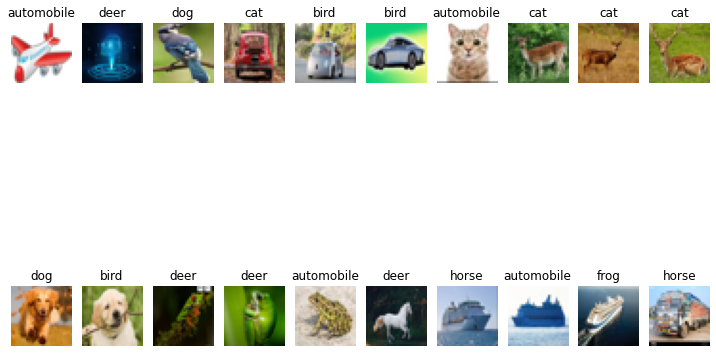

In [30]:
import os
import matplotlib.pyplot as plt
from tensorflow.python.keras.preprocessing import image
from PIL import Image
import numpy as np

# Set the path to the directory containing the images
image_dir = 'G:/OneDrive - UCLan/Parthiban MS in ADS/Semester 2/Visual Information Processing/Course Work/Images/'

# Define the class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Define the figure size and number of rows and columns
fig_size = (10, 10)
rows = 2
cols = 10

# Create the figure and axes
fig, axes = plt.subplots(rows, cols, figsize=fig_size)
axes = axes.ravel()

# Loop through all image files in the directory
for i, filename in enumerate(os.listdir(image_dir)):
    if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.png') or filename.endswith('.JPG'):
        # Load the image and convert to numpy array
        img_path = os.path.join(image_dir, filename)

        img = image.load_img(img_path, target_size=(32, 32)) ## Loading image with size 32*32
        img_arr = np.array(img)                              ## Converting image to array
        img_arr = img_arr.reshape(1, -1)                     ## Reshaping to 1D array
        img_arr = img_arr.astype('float32') / 255            ## Normalizing the pixel values between 0 and 1
        img_arr = pca.transform(img_arr)                     ## Transforming the test set data using PCA

        # Predict the class of the image
        result = kmeans.predict(img_arr)
        class_index = result[0]
        predicted_class_name = class_names[class_index]

        # Plot the image and its predicted class
        axes[i].imshow(img)
        axes[i].set_title(predicted_class_name)
        axes[i].axis('off')

# Show the figure
plt.tight_layout()
plt.show()
